## Importing all the required libraries

In [111]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

### Reading the training dataset to Pandas DataFrame

In [112]:
data = pd.read_csv('oversampled.csv')
data.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Highly_Fatal_And_Damaging,68.995434,11,10,54.056518,0.605691,82.25,2,31738.546308,1,0.429075,9145
1,Highly_Fatal_And_Damaging,13.378995,18,8,68.003646,0.384270,78.93,4,31041.738511,2,0.057707,9311
2,Significant_Damage_And_Serious_Injuries,33.059361,15,2,62.032817,0.386795,83.19,3,26459.332730,1,0.130517,3714
3,Significant_Damage_And_Serious_Injuries,33.242009,15,2,63.901550,0.377419,79.39,6,32275.908805,1,0.007995,11635
4,Minor_Damage_And_Injuries,43.926941,15,0,86.782133,0.286542,77.30,6,33027.739592,1,0.007699,10761


### Getting the target variables to Y variable

In [113]:
Y = data['Severity']
Y.shape

(10847,)

### Dropoing the irrelevent columns from training data

In [114]:
data = data.drop(columns=['Severity','Accident_ID','Accident_Type_Code','Adverse_Weather_Metric'],axis=1)
data.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Max_Elevation,Violations
0,68.995434,11,10,54.056518,0.605691,82.25,31738.546308,1
1,13.378995,18,8,68.003646,0.384270,78.93,31041.738511,2
2,33.059361,15,2,62.032817,0.386795,83.19,26459.332730,1
3,33.242009,15,2,63.901550,0.377419,79.39,32275.908805,1
4,43.926941,15,0,86.782133,0.286542,77.30,33027.739592,1


### creating the Label Encoder object which will encode the target severities to numerical form

In [115]:
label_encode = LabelEncoder()
y = label_encode.fit_transform(Y)

In [116]:
x_train,x_test,y_train,y_test = train_test_split(data,y,test_size=0.2)

In [125]:
weights={0:1,1:1.3,2:1.5,3:1.1}
dtc = DecisionTreeClassifier(criterion='entropy',max_depth=10,class_weight='balanced')
bag = BaggingClassifier(n_estimators=150,oob_score=True, bootstrap_features=True,base_estimator=dtc)

In [126]:
bag.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                        criterion='entropy',
                                                        max_depth=10,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'

In [127]:
predictions = bag.predict(x_test)

In [128]:
accuracy_score(y_test,predictions)

0.956221198156682

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[572,   9,  14,  19],
       [  5, 500,   1,   3],
       [  2,   1, 300,   3],
       [  9,  10,   7, 545]], dtype=int64)

In [129]:
test_data = pd.read_csv('test.csv')
accident_id = test_data['Accident_ID']

In [130]:
print(test_data.shape)
test_data = test_data.drop(columns=['Accident_ID','Accident_Type_Code','Adverse_Weather_Metric'],axis=1)

(2500, 11)


In [131]:
test_data.shape

(2500, 8)

In [132]:
predictions = bag.predict(test_data)

In [133]:
predictions = label_encode.inverse_transform(predictions)

In [134]:
result_df = pd.DataFrame({'Accident_ID':accident_id,'Severity':predictions})
result_df.head()

,Accident_ID,Severity
0,1,Highly_Fatal_And_Damaging
1,10,Significant_Damage_And_Fatalities
2,14,Significant_Damage_And_Serious_Injuries
3,17,Highly_Fatal_And_Damaging
4,21,Significant_Damage_And_Fatalities


In [135]:
result_df.to_csv('Prediction.csv',index=False)

## Accuracy - 85.44

In [101]:
data = pd.read_csv('oversampled.csv')

In [109]:
data['y'] = y

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F7D43C3B08>]],
      dtype=object)

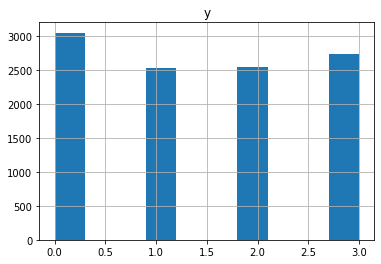

In [110]:
data.hist(column='y')